In [ ]:
# This code plots a spectra, marking h alpha and h beta. It also return the
# corresponding fluxes for h alpha and h heta

In [1]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
import os 
from astropy import units as u
from specutils import Spectrum1D, SpectralRegion
from specutils.manipulation import SplineInterpolatedResampler
import scipy.signal
import lineid_plot

In [2]:
path = '/Users/quinncasey/Desktop/research/eboss/0.1-bin/0.1-spec-files-less'

In [3]:
for root, directories, files in os.walk(path, topdown=False):
    for name in files:
        print(os.path.join(root, name))

/Users/quinncasey/Desktop/research/eboss/0.1-bin/0.1-spec-files-less/5298/spec-5298-55979-0880.fits
/Users/quinncasey/Desktop/research/eboss/0.1-bin/0.1-spec-files-less/6986/spec-6986-56717-0276.fits
/Users/quinncasey/Desktop/research/eboss/0.1-bin/0.1-spec-files-less/7032/spec-7032-56471-0053.fits
/Users/quinncasey/Desktop/research/eboss/0.1-bin/0.1-spec-files-less/7310/spec-7310-56693-0844.fits
/Users/quinncasey/Desktop/research/eboss/0.1-bin/0.1-spec-files-less/8197/spec-8197-57064-0290.fits


In [4]:
f1 = fits.open('/Users/quinncasey/Desktop/research/eboss/0.1-bin/0.1-spec-files-less/5298/spec-5298-55979-0880.fits')
f2 = fits.open('/Users/quinncasey/Desktop/research/eboss/0.1-bin/0.1-spec-files-less/6986/spec-6986-56717-0276.fits')
f3 = fits.open('/Users/quinncasey/Desktop/research/eboss/0.1-bin/0.1-spec-files-less/7032/spec-7032-56471-0053.fits')
f4 = fits.open('/Users/quinncasey/Desktop/research/eboss/0.1-bin/0.1-spec-files-less/7310/spec-7310-56693-0844.fits')
f5 = fits.open('/Users/quinncasey/Desktop/research/eboss/0.1-bin/0.1-spec-files-less/8197/spec-8197-57064-0290.fits')

In [5]:
def smooth_spec(lamb, flux, fluxhat):
    
    pk = lineid_plot.initial_plot_kwargs()
    pk['color'] = "red"
    line_wave = [4862.68, 6563]
    line_label = ['H\u03B2', 'H\u03B1']
    line_wave1 = [3346.79, 3426.85, 3727.092, 3729.875, 3889.0, 4072.3, 4102.89, 4341.68, 4364.436, 4862.68, 4932.603, 4960.295, 5008.240, 6302.046, 6365.536, 6529.03, 6549.86, 6564.61, 6585.27, 6718.29, 6732.67]
    line_label1 = ['Ne V', 'Ne VI', 'O II', 'O II', 'He I', 'S II', 'H\u0394', 'H\u03B3', 'O III', 'H\u03B2', 'O III', 'O III', 'O III', 'O I', 'O I', 'N I', 'N II', 'H\u03B1', 'N II', 'S II', 'S II']
    
    #Smoothed spectra
    plt.style.use('grayscale')
    f, ax = plt.subplots(figsize=(12, 6)) 
    plt.xlabel('R-Frame Wavelength ($\AA$)')
    plt.ylabel('erg/s/$cm^2$/Ang')
    plt.title(plate, loc='right')
    ax.step(lamb[np.where(snr > 0)], fluxhat[np.where(snr > 0)], c='k')
    lineid_plot.plot_line_ids(lamb, fluxhat, line_wave, line_label, ax=ax, plot_kwargs=pk)
    
    return

/Users/quinncasey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


H Alpha flux = 5.148026701906242e-17
H Beta flux = 2.1190866787977398e-17


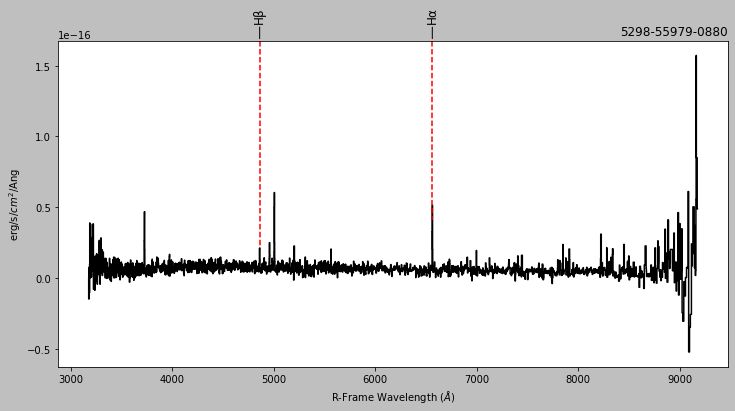

In [32]:
z = f1[2].data['z']
lamb = (((10**f1[1].data['loglam']))/(1+z))
flux = f1[1].data['flux']
err = np.sqrt(1/f1[1].data['ivar'])
plate = '5298-55979-0880'

snr = flux/err
flux = flux *10**-17* u.Unit('erg cm-2 s-1 AA-1')
fluxhat = scipy.signal.medfilt(flux)

str2 = 'H Beta flux ='
str1 = 'H Alpha flux ='
print(str1, np.interp(6565, lamb, fluxhat))
print(str2, np.interp(4862.68, lamb, fluxhat))

smooth_spec(lamb, flux, fluxhat)

/Users/quinncasey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


H Beta flux = 2.9138344610082215e-16
H Alpha flux = 8.423125385183705e-16


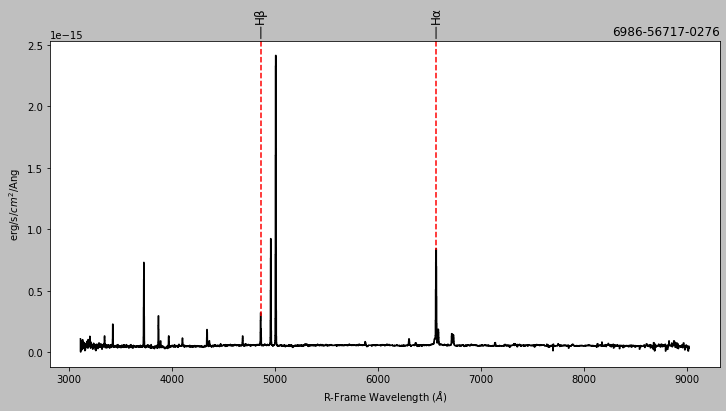

In [28]:
z = f2[2].data['z']
lamb = (10**f2[1].data['loglam'])/(1+z)
flux = f2[1].data['flux']
err = np.sqrt(1/f2[1].data['ivar'])
plate = '6986-56717-0276'

snr = flux/err
flux = flux *10**-17* u.Unit('erg cm-2 s-1 AA-1')
fluxhat = scipy.signal.medfilt(flux)

str1 = 'H Beta flux ='
str2 = 'H Alpha flux ='
print(str1, np.interp(4862.68, lamb, fluxhat))
print(str2, np.interp(6565, lamb, fluxhat))

smooth_spec(lamb, flux, fluxhat)

/Users/quinncasey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


H Beta flux = 1.402224299961937e-17
H Alpha flux = 5.1377501408481283e-17


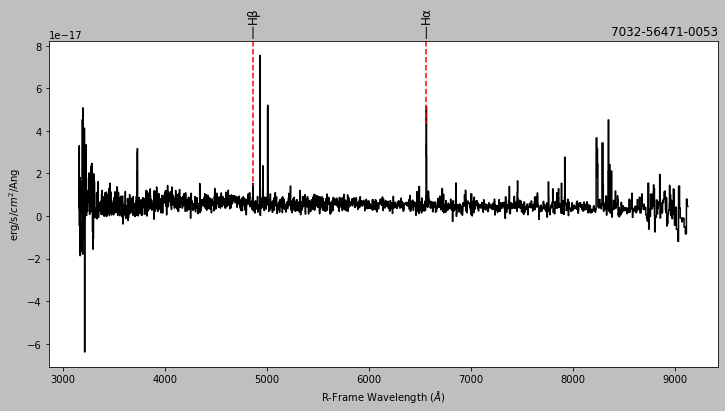

In [29]:
z = f3[2].data['z']
lamb = (10**f3[1].data['loglam'])/(1+z)
flux = f3[1].data['flux']
err = np.sqrt(1/f3[1].data['ivar'])
plate = '7032-56471-0053'

snr = flux/err
flux = flux *10**-17* u.Unit('erg cm-2 s-1 AA-1')
fluxhat = scipy.signal.medfilt(flux)

str1 = 'H Beta flux ='
str2 = 'H Alpha flux ='
print(str1, np.interp(4862.68, lamb, fluxhat))
print(str2, np.interp(6565, lamb, fluxhat))

smooth_spec(lamb, flux, fluxhat)

/Users/quinncasey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


H Beta flux = 5.13941740609079e-17
H Alpha flux = 1.4561253138408057e-16


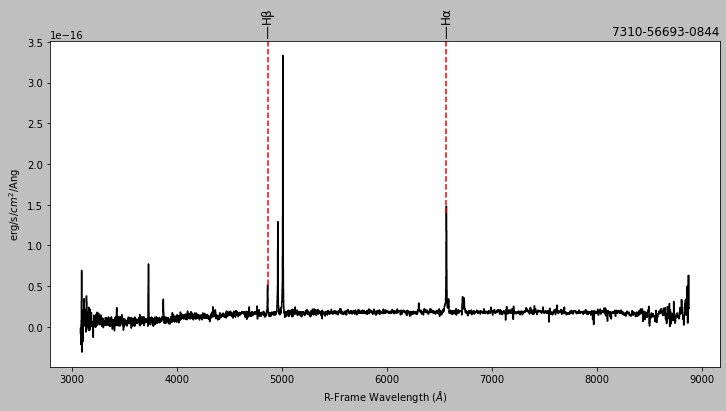

In [30]:
z = f4[2].data['z']
lamb = (10**f4[1].data['loglam'])/(1+z)
flux = f4[1].data['flux']
err = np.sqrt(1/f4[1].data['ivar'])
plate = '7310-56693-0844'

snr = flux/err
flux = flux *10**-17* u.Unit('erg cm-2 s-1 AA-1')
fluxhat = scipy.signal.medfilt(flux)

str1 = 'H Beta flux ='
str2 = 'H Alpha flux ='
print(str1, np.interp(4862.68, lamb, fluxhat))
print(str2, np.interp(6565, lamb, fluxhat))

smooth_spec(lamb, flux, fluxhat)

/Users/quinncasey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


H Beta flux = 2.4512628913365794e-17
H Alpha flux = 6.094001700078215e-17


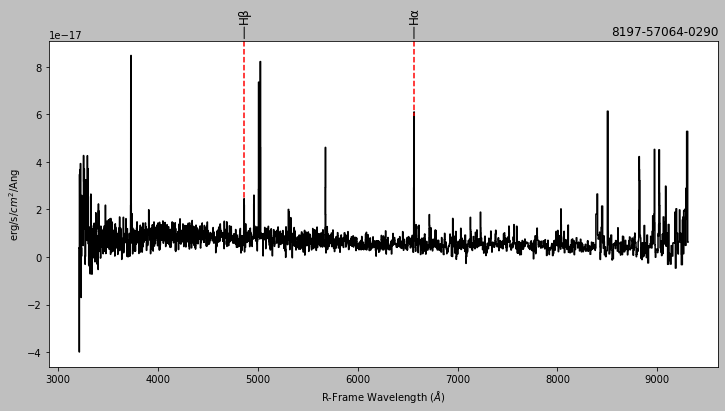

In [31]:
z = f5[2].data['z']
lamb = (10**f5[1].data['loglam'])/(1+z)
flux = f5[1].data['flux']
err = np.sqrt(1/f5[1].data['ivar'])
plate = '8197-57064-0290'

snr = flux/err
flux = flux *10**-17* u.Unit('erg cm-2 s-1 AA-1')
fluxhat = scipy.signal.medfilt(flux)

str1 = 'H Beta flux ='
str2 = 'H Alpha flux ='
print(str1, np.interp(4862.68, lamb, fluxhat))
print(str2, np.interp(6565, lamb, fluxhat))

smooth_spec(lamb, flux, fluxhat)